We want to start thinking about how to correct for excess micromotion caused by stray DC fields. Haeffner group used a tickle at $\Omega_{rf} + \omega_s$ to move the ion with 50 nm of the null. Still looking to why this frequency instead of directly at the secular frequency. This frquency comes from keeping the next order in the Mathieu solutions.

Our first attempt gives optimal compensation with 0.6 V and 0.67 V on the RF rods, and 50 V on the endcaps. I want to make sure the a-parameter hasn't changed the secular frequency to a point where the tickle is too far from resonance to perturb the ion. We know that the secular frequency of a radial mode is given by:

$\Large \omega_\mathrm{s} = \beta\frac{\Omega_\mathrm{rf}}{2}$

with

$\Large \beta \approx \sqrt{a + \frac{q^2}{2}}$

The Mathiue $a$ and $q$ parameters for our 4-rod trap are given by:

$\Large a_x =  -\left(\frac{8eU_{\mathrm{EC}}}{m\omega_{\mathrm{rf}}^2z_0^2} -\frac{4eU_0}{m\omega_{\mathrm{rf}}^2r_0^2}\right)$

$\Large a_y = - \left(\frac{8eU_{\mathrm{EC}}}{m\omega_{\mathrm{rf}}^2z_0^2} + \frac{4eU_0}{m\omega_{\mathrm{rf}}^2r_0^2}\right)$

$\Large q_x = \frac{2eV_0}{m\omega_{\mathrm{rf}}^2r_0^2} = -q_y$

Since there is no RF applied in the z-direction, endcap voltages provide a static 1D harmonic osicllator trapping potential with secular frequency:

$\Large \omega_z = 2\sqrt{\frac{eU_{\mathrm{EC}}}{mz_0^2}}$

with $z_0$ a characteristic distance defining an ideal static quadrupole in 3D, with $r_0$ being the other characterstic distance. Since we've measured the axial secular frequency at a given endcap voltage, we can calculate $z_0$, and therefore estimate $a_x$ and $a_y$ to determine how much we expect our secular frequency to shift for a given DC voltage on the trap rods.

In [4]:
omega_rf = 2*np.pi*1.e6
U_dc = 0.0
U_ec = 1.0
r_0 = 3.0e-3
charge = 1.602e-19
m = 138*1.66e-27
V_rf = 200.0
omega_z = 2*np.pi*12.e3


# First calculate characteristic z0

z_0 = np.sqrt(charge*U_ec/m)*2/omega_z

print 'Characterstiz z :', '{:.2f}'.format(z_0*1e3), 'mm'

ax = -(8*charge*U_ec/m/omega_rf**2/z_0**2 - 4*charge*U_dc/m/omega_rf**2/r_0**2 )
ay = -(8*charge*U_ec/m/omega_rf**2/z_0**2 + 4*charge*U_dc/m/omega_rf**2/r_0**2 )
qx = 2*charge*V_rf/m/omega_rf**2/r_0**2

print 'ax :', '{:.3f}'.format(ax)
print 'ay :', '{:.3f}'.format(ay)
print 'qx :', '{:.3f}'.format(qx)

## Now we can calculate our secular frequencies
bx = np.sqrt(ax + qx**2/2)
by  = np.sqrt(ay + qx**2/2)

print 'beta x :', '{:.3f}'.format(bx)
print 'beta y :', '{:.3f}'.format(by)


omega_x = omega_rf*bx/2/2/np.pi
omega_y = omega_rf*by/2/2/np.pi

print 'omega x :', '{:.3f}'.format(omega_x*1e-3), 'kHz'
print 'omega y :', '{:.3f}'.format(omega_y*1e-3), 'kHz'

Characterstiz z : 22.18 mm
ax : -0.000
ay : -0.000
qx : 0.787
beta x : 0.556
beta y : 0.556
omega x : 278.219 kHz
omega y : 278.219 kHz


### Barium Line Scan

We want to do our standard pump/probe line scan to see if our micromotion compensation reduces the temperature. Using the three-level notes/code from my thesis.

Population of the excited state:

\begin{equation}
\label{eq:population_cpt}
\rho_{33} = \frac{4(\Delta_B - \Delta_R)^2\Omega_B^2\Omega_R^2\Gamma}{Z}    
\end{equation}
with $Z$ given by:
\begin{equation}
\begin{split}
&Z = 8(\Delta_B - \Delta_R)^2\Omega_B^2\Omega_R^2\Gamma\\
& + 4(\Delta_B - \Delta_R)^2\Gamma^2(\Omega_B^2\Gamma_R + \Omega_R^2\Gamma_B) \\
& + 16(\Delta_B - \Delta_R)^2[\Delta_B^2\Omega_R^2\Gamma_B + \Delta_R^2\Omega_B^2\Gamma_R]\\
& - 8\Delta_B(\Delta_B - \Delta_R)\Omega_R^4\Gamma_B + 8\Delta_R(\Delta_B - \Delta_R)\Omega_B^4\Gamma_R\\
& + (\Omega_B^2 + \Omega_R^2)(\Omega_B^2\Gamma_R + \Omega_R^2\Gamma_B)
\end{split}
\end{equation}

-188495559.215
[2.45274236e+01 8.04185060e+07 5.33800816e+05 5.58117162e+02]


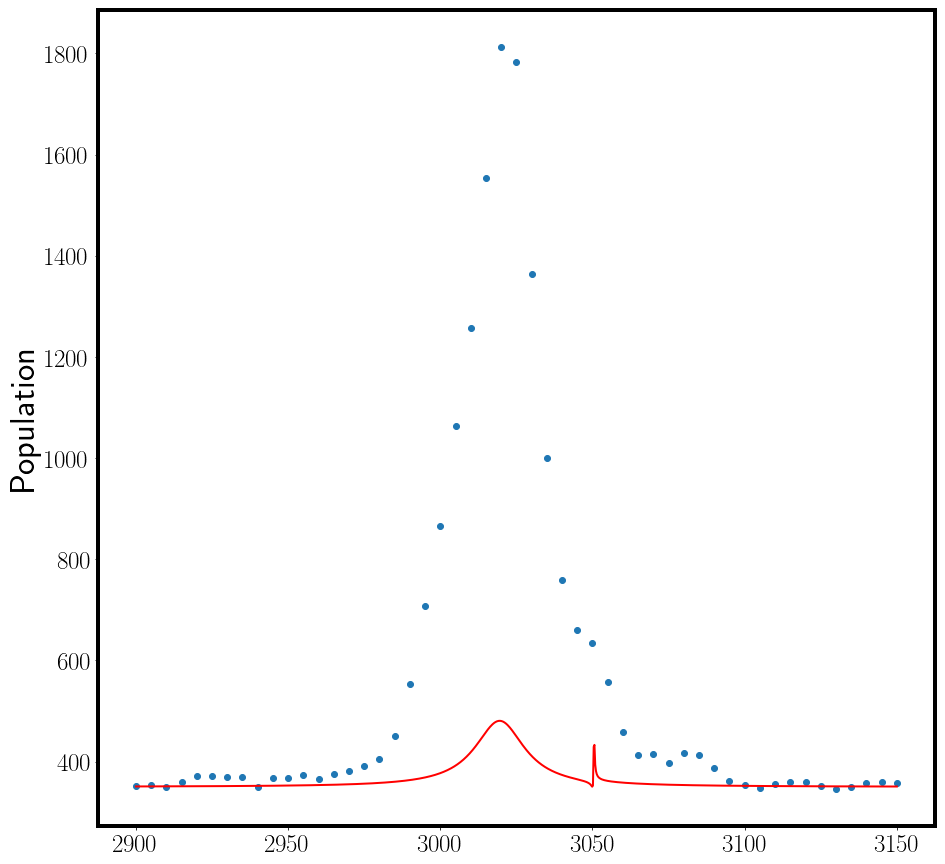

In [86]:
# Definitions
rcParams['figure.figsize'] = 15, 15
rcParams['axes.linewidth'] = 4
from scipy.optimize import curve_fit
gamma_b = 2*np.pi*15.2e6
gamma_r = 2*np.pi*4.9e6
gamma = gamma_b + gamma_r
#s_b = 10.
#s_r = 10.
omega_b = gamma*np.sqrt(s_b/2)
omega_r = gamma*np.sqrt(s_r/2)
#delta_b = 2*np.pi*25.e6
delta_r = -2*np.pi*30.e6

data = np.loadtxt('Z:/Group_Share/Barium/Data/2020.dir/08.dir/2020_08_13.dir/00015 - ProbeLineScan.csv', delimiter = ',')
frequency = data[:,0] 
counts = data[:,1]
#delta_b = np.linspace(-2*np.pi*100.e6, 2*np.pi*100.e6, 1.e3)

def population(freq, f0, s_b, s_r, A, C):
    
    delta_b = (freq - f0)*1e6*2*np.pi
    delta_r = 2*np.pi*30.e6
    omega_b = gamma*np.sqrt(s_b/2)
    omega_r = gamma*np.sqrt(s_r/2)
    num = 4*(delta_b - delta_r)**2*omega_b**2*omega_r**2*gamma

    Z = 8*(delta_b-delta_r)**2*omega_b**2*omega_r**2*gamma \
        + 4*(delta_b - delta_r)**2*gamma**2*(omega_b**2*gamma_r + omega_r**2*gamma_b) \
        + 16*(delta_b - delta_r)**2*(delta_b**2*omega_r**2*gamma_b + delta_r**2*omega_b**2*gamma_r) \
        - 8*delta_b*(delta_b - delta_r)*omega_r**4*gamma_b + 8*delta_r*(delta_b - delta_r)*omega_b**4*gamma_r \
        + (omega_b**2 + omega_r**2)**2*(omega_b**2*gamma_r + omega_r**2*gamma_b)

    return A*num/Z + C

print delta_r
p0 = [3020., .02, .08 ,200000, 350]

# Fit
#fit, var = curve_fit(population, frequency, counts, p0)
print fit
fit_x = np.linspace(frequency[0], frequency[-1], 1000)

fit_y = population(fit_x, 3020., .001,.3, 200000, 350)
#fit_y = population(fit_x, fit[0], fit[1], fit[2], fit[3], fit[4])


plot(frequency, counts, 'o')
plot(fit_x, fit_y, color = 'red', linewidth = 2)
#label(r'Detuning (MHz)', fontsize = 35)
ylabel(r'Population', fontsize = 35)
xticks(size=25)
yticks(size=25)
show() 
